# Toroidal coordinates on surface of genus two

An example of how, in the presence of more than one prominent circular feature in the data, the toroidal coordinates algorithm returns circle-valued maps that are geometrically less correlated and easier to interpret than the ones returned by running the circular coordinates algorithm on each individual class.

In [1]:
import matplotlib.pyplot as plt
from dreimac import CircularCoords, ToroidalCoords, GeometryExamples, PlotUtils, CircleMapUtils
from persim import plot_diagrams

We start by displaying the data, which consists of a pointcloud in 3D.

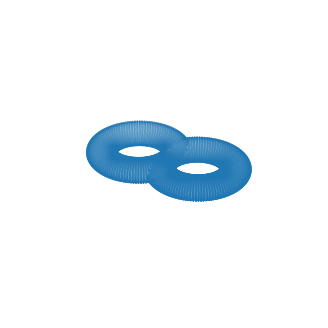

In [2]:
X = GeometryExamples.genus_two_surface()

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(projection="3d")
ax.scatter(X[:,0], X[:,1], X[:,2], s=0.1)
PlotUtils.set_axes_equal(ax)
plt.axis("off")
plt.show()

Compute and display the Rips persistent homology.

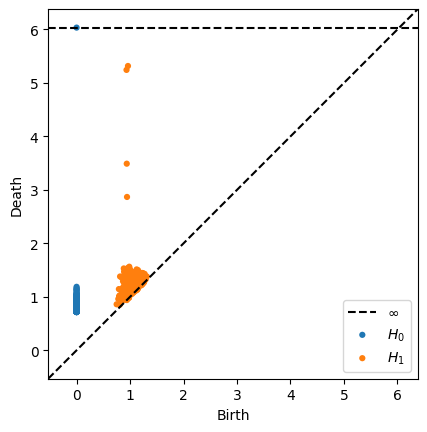

In [17]:
n_landmarks = 750

tc = ToroidalCoords(X, n_landmarks=n_landmarks)
plot_diagrams(tc.dgms_)

We now construct two sets of four circle-valued maps. For the first set, we use the toroidal coordinates with input the four most prominent persistent cohomology classes; for the second, we run the circular coordinates algorithm on each of the four individual classes.

In [18]:
cohomology_classes = [0, 1, 2, 3]
toroidal_coords = tc.get_coordinates(cocycle_idxs=cohomology_classes)

We display the circle-valued representations obtained with toroidal coordinates.

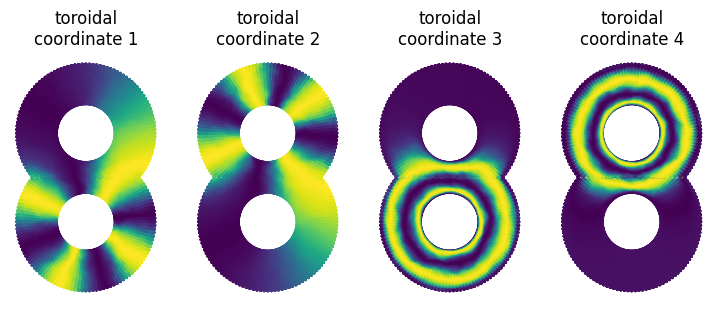

In [23]:
fig = plt.figure(figsize=(9,4))
for i, coordinate in enumerate(toroidal_coords):
    coloring = CircleMapUtils.levelset_coloring(CircleMapUtils.center(coordinate))
    plt.subplot(1, len(toroidal_coords), i + 1)
    plt.scatter(X[:, 1], X[:, 0], s=2, c=coloring, cmap="viridis")
    plt.title("toroidal\ncoordinate " + str(i+1))
    plt.gca().set_aspect("equal") ; _ = plt.axis("off")


In [20]:
cc = CircularCoords(X, n_landmarks=n_landmarks)
circular_coords1 = cc.get_coordinates(cocycle_idx=cohomology_classes[0])
circular_coords2 = cc.get_coordinates(cocycle_idx=cohomology_classes[1])
circular_coords3 = cc.get_coordinates(cocycle_idx=cohomology_classes[2])
circular_coords4 = cc.get_coordinates(cocycle_idx=cohomology_classes[3])
circular_coords = [ circular_coords1, circular_coords2, circular_coords3, circular_coords4 ]

We display the circle-valued representations obtained with circular coordinates.

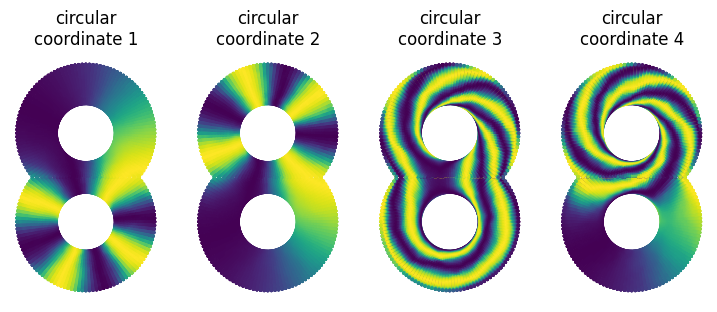

In [22]:
fig = plt.figure(figsize=(9,4))
for i, coordinate in enumerate(circular_coords):
    coloring = CircleMapUtils.levelset_coloring(CircleMapUtils.center(coordinate))
    plt.subplot(1, len(toroidal_coords), i + 1)
    plt.scatter(X[:, 1], X[:, 0], s=2, c=coloring, cmap="viridis")
    plt.title("circular\ncoordinate " + str(i+1))
    plt.gca().set_aspect("equal") ; _ = plt.axis("off")